<a href="https://colab.research.google.com/github/Dashnyam7/Deep-Learning/blob/main/Neural_Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network weight

Add the following program to the end of the constructor

In [ ]:
self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
self.B3 = self.sigma * np.random.randn(1, self.n_output)

Line 1: Weight initialization. The weight shape is (n_features (the number of explanatory variables (28 * 28)), n_nodes1 (the number of nodes in the first layer)). number), n_features (number of explanatory variables)), so the shape after calculation using this weight (shape of output) is (batch_size, n_nodes1) (weight shape is
( The reason why it becomes self.n_features, self.n_nodes1).As an input to the neural network, data of shape (batch_size (number of data to be learned at one time), n_features (number of explanatory variables (28 * 28))) is entered. For example, the shape (shape of output) after calculation using weight W1 for this input is (batch_size, n_nodes1), so the shape of weight is (n_features (number of explanatory variables), n_nodes1 (1 layer number of nodes))).)

(batch_size,n_features)×(n_features,n_nodes1)=(batch_size,n_nodes1)

Line 2: Weight initialization. Since shape is (n_nodes1, n_nodes2), the output of the previous layer (batch_size, n_nodes1) is received as input, so the shape after calculation (output shape) is (batch_size, n_nodes2).

(batch_size,n_nodes1)×(n_nodes1,n_nodes2)=(batch_size,n_nodes2)

Line 3: Weight initialization. Since shape is (n_nodes2, n_output), the output of the previous layer (batch_size, n_nodes2) is received as input, so the shape after calculation (output shape) is (batch_size, n_output).

(n_nodes1,n_nodes2)×(n_nodes2,n_output)=(batch_size,n_output)

Line 4: Bias initialization. shape is (1,n_nodes1). The role of bias is the image of a constant term in linear regression. When calculating, add to the output of the first layer

Line 5: Initialize the bias. shape is (1, n_nodes2). When calculating, add to the output of the second layer

Line 6: Initialize the bias. shape is (1, n_output). When calculating, add to the output of the third layer

### Forward Propogation

Forward propagation (forward propagation method), as the word forward, the input data goes through the network in the forward direction (here from left to right).
Each hidden layer (hidden layer) then receives input data, processes it according to its activation function, and passes it on to the next layer.

Therefore, forward propagation sequentially calculates and stores intermediate variables in the computational graph defined by the neural network. We proceed from the input layer to the output layer.

### What is cross-entropy error (cross-entropy loss)?

When tackling machine learning and deep learning problems, loss and cost functions are used to optimize the model during training.
The goal is almost always the minimization of the loss function. The smaller the loss, the better the model. Cross-entropy error is an important cost function. Used to optimize classification models.
(Many ○○ functions have appeared, but a simple image is the relationship of objective function ⊃ cost function, error function, and loss function .
Although strictly different, these functions have the estimated value and label error is motivated to minimize

The purpose of cross-entropy is to get the output probability (P) to measure the distance from the value of the correct label.

As an example, let's say the desired output of a class and the output of a model were:

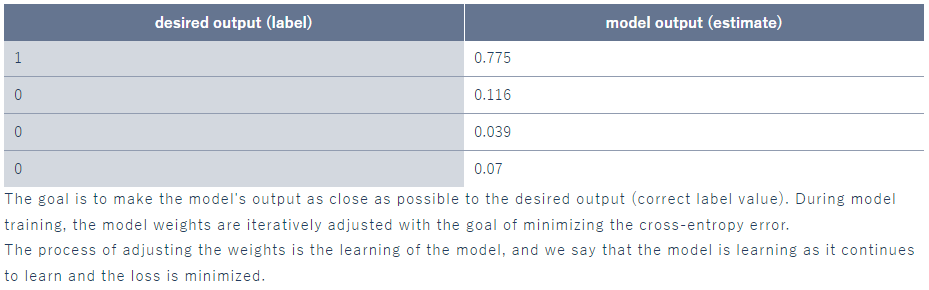

### Back Propogation

Backpropagation is a method of computing the gradients of the parameters of a neural network. In other words, it follows the chain rule of calculus and traces the network backwards from the output layer to the input layer.
This algorithm saves the intermediate variables (partial derivatives) needed to compute the gradients with respect to the parameters.

Backpropagation sequentially computes and stores gradients of intermediate variables and parameters in a neural network in reverse order.

# Forward Propogation

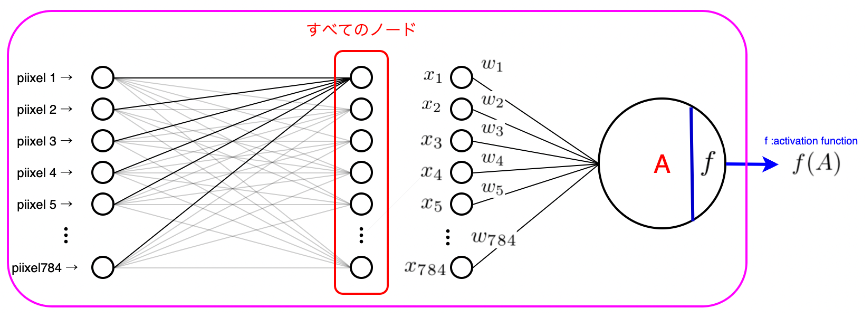

As shown in the image above, the input layer contains 784 MNIST data as is.

Each node in the middle layer receives the total value (A) of the values ​​obtained by multiplying each of the 784 pieces of data as the input value of each node. Then, the value (f(A)) passing the total value (A) through the function (f) becomes the output value of each node. Similarly for multiple hidden layers, the output from the previous hidden layer is taken as input by the next hidden layer.

The output layer performs the same processing as the intermediate layer.

### Bias

For each hidden layer, we need to add a node called the bias, which acts as a constant term in linear regression.

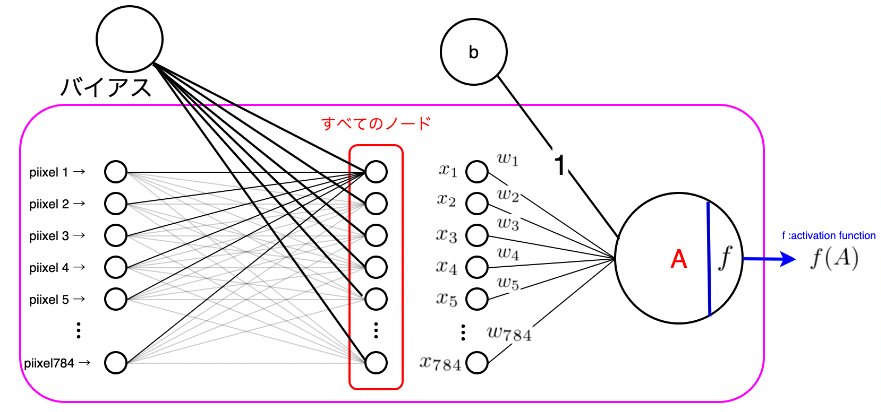

Just like linear regression and the method of steepest descent that we have used in other textbooks, neural networks also have a mechanism that improves estimation accuracy as they learn.

That's what we call error backpropagation. Inference propagates values ​​from left to right, but error backpropagation, as its name suggests, propagates from right to left, updating the weight w in the process like the steepest descent method. To go.
Forward propagation is called forward propagation, and backward propagation is called back propagation.

### Formula

We will express the forward propagation processing of the three-layer neural network with formulas.

"First layer"

\[A_1 = X \cdot W_1 + B_1\]
$X$ : feature vector (batch_size, n_features)

$W_1$ : 1st layer weight (n_features, n_nodes1)

$B_1$ : 1st layer bias (n_nodes1,)

$A_1$ : output (batch_size, n_nodes1)

"Activation function of the first layer"

\[Z_1 = f(A_1)\]
$f()$ : activation function

$Z_1$ output (batch_size, n_nodes1)

"Second layer"

\[A_2 = Z_1 \cdot W_2 + B_2\]
$W_2$ : 2nd layer weight (n_nodes1, n_nodes2)

$B_2$ : 2nd layer bias (n_nodes2,)

$A_2$ : output (batch_size, n_nodes2)

"Second layer activation function"

\[Z_2 = f(A_2)\]
$f()$ : activation function

$Z_2$ output (batch_size, n_nodes2)

"3rd layer (output layer)"

\[A_3 = Z_2 \cdot W_3 + B_3\]
$W_3$ : 3rd layer weight (n_nodes2, n_output)

$B_3$ : 3rd layer bias (n_output,)

$A_3$ : Output (batch_size, n_output)

"3rd layer activation function"

\[Z_3 = softmax(A_3)\]
$softmax()$ : softmax function

$Z_3$ output (batch_size, n_output)

$Z_3$ is an array of probabilities for each label (0-9).

### Implementation

In [1]:
def forward(self, X):
    self.A1 = X @ self.W1 + self.B1
    self.Z1 = self.tanh_function(self.A1)
    self.A2 = self.Z1 @ self.W2 + self.B2
    self.Z2 = self.tanh_function(self.A2)
    self.A3 = self.Z2 @ self.W3 + self.B3
    self.Z3 = self.softmax(self.A3)

Line 1: Function definition. receives the explanatory variable X as an argument

Line 2: Add the bias B1 to the result of the matrix product of the explanatory variable X and the weight W1 to calculate the first layer A1

3rd line: Pass the result A1 of the 2nd line through the function (f) (activation function tanh here) to obtain the output of the 1st layer

4th line: The result Z1 of the 3rd line becomes the input of the 2nd layer, and the bias B2 is added to the result of matrix multiplication of Z1 and weight W2 to calculate A2 of the 2nd layer.

Line 5: Pass the result of line 4 through function (f) (activation function tanh here) to obtain the output of the second layer

Line 6: The result Z2 of the 3rd line becomes the input of the 3rd layer, and the bias B3 is added to the result of the matrix multiplication of the Z2 weight W3 to calculate A3 of the 3rd layer

Line 7: Passes the result of line 6 through function (f) (softmax for the activation function at the output).

# Implementation of cross-entropy error

The smaller the loss, the better the model. Cross-entropy error is an important cost function. Used to optimize classification models.

The purpose of cross-entropy is to get the output probability (P) to measure the distance from the value of the correct label.

### Formula

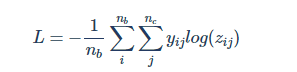

$y_{ij}$ : correct label of $k$th class of $j$th sample (scalar 0 or 1 in one-hot representation)

$z_{ij}$ : Probability of $k$th class of $j$th sample (scalar)

$n_{b}$ : batch size, batch_size

$n_{c}$ : number of classes, n_output (10 for MNIST this time)

The domain of log(x) in real numbers 0 < xis
Therefore, it raises an error when the contents of log become very small values. You can avoid the error by adding 1e-7 in the log.

In [ ]:
def cross_entropy_error(self, y, Z):
    L = - np.sum(y * np.log(Z+1e-7)) / len(y)
    return L

Line 1: Definition of the cross-entropy error function. I am passing the following as arguments: y is the label, Z is the estimated value (output from the neural network)

Line 2: Implements the cross-entropy error formula. Add 1e-7 to avoid error

Line 3: Returns the cross-entropy error

# Back Propogation

Similar to the gradient descent method, we find the error, multiply the gradient calculated from the error by the learning rate, and update each weight.

In steepest descent, we have updated each value to minimize the loss function. Backpropagation similarly uses the cross-entropy error as the loss function when classifying.

### Weight update

We introduced that the weights are updated to minimize the cross-entropy error function, but the weights are updated according to the learning rate using the gradient obtained by differentiation. This is called gradient descent, and there are two types of gradient descent:

"Normal" Gradient Descent
As you can see in the formula below, we update the weights with all the data (batch).

"Stochastic" Gradient Descent
Unlike "normal" gradient descent, we update the weights with some data (mini-batches) .

This stochastic gradient descent method is used to update the neural network weights.

Expressed mathematically, stochastic gradient descent looks like this:

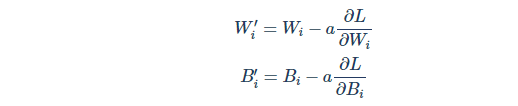

First of all, I would like to introduce the basic knowledge about differentiation and partial differentiation used in the calculation.

Differentiation and partial differentiation
Differentiation means finding the slope of any function at any point.

In [ ]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x)) / (h)

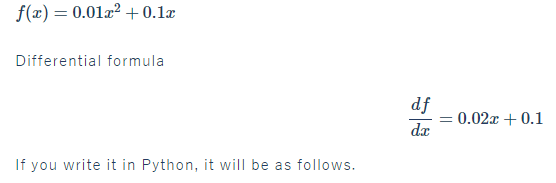

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.
def function_tmp2(x1):
    return 3.0**2 + x1*x1

### Formula


As the name suggests, the error backpropagation method calculates from the output layer in the opposite direction to forward propagation. Therefore, the calculation starts from the 3rd layer.

"3rd layer"

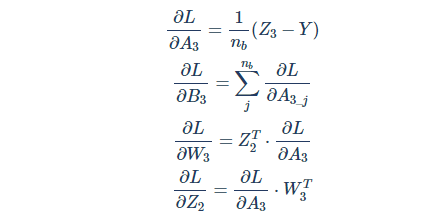

$\frac{\partial L}{\partial A_3}$ : gradient of loss $L$ with respect to $A_3$ (batch_size, n_output)

$\frac{\partial L}{\partial A_{3_j}}$ : Gradient of loss $L$ with respect to $A_3$ of j-th sample (n_nodes2,)

$\frac{\partial L}{\partial B_3}$ : Gradient of loss $L$ with respect to $B_3$ (n_output,)

$\frac{\partial L}{\partial W_3}$ : Gradient of loss $L$ with respect to $W_3$ (n_nodes2, n_output)

$\frac{\partial L}{\partial Z_2}$ : Gradient of loss $L$ with respect to $Z_2$ (batch_size, n_nodes2)

$Z_{3}$ : Softmax function output (batch_size, n_nodes2)

$Y$ : correct label (batch_size, n_output)

$Z_{2}$ : 2nd layer activation function output (batch_size, n_nodes2)

$W_3$ : 3rd layer weight (n_nodes2, n_output)

$n_{b}$ : batch size, batch_size

"Second layer"

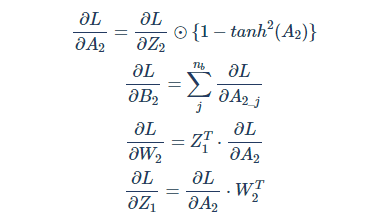

$\frac{\partial L}{\partial A_2}$ : Gradient of loss $L$ with respect to $A_2$ (batch_size, n_nodes2)

$\frac{\partial L}{\partial A_{2_j}}$ : Gradient of loss $L$ with respect to $A_2$ at j-th sample (n_nodes2,)

$\frac{\partial L}{\partial B_2}$ : Gradient of loss $L$ with respect to $B_2$ (n_nodes2,)

$\frac{\partial L}{\partial W_2}$ : gradient of loss $L$ with respect to $W_2$ (n_nodes1, n_nodes2)

$\frac{\partial L}{\partial Z_2}$ : Gradient of loss $L$ with respect to $Z_2$ (batch_size, n_nodes2)

$A_2$ : 2nd layer output (batch_size, n_nodes2)

$Z_{1}$ : 1st layer activation function output (batch_size, n_nodes1)

$W_2$ : 2nd layer weight (n_nodes1, n_nodes2)

⊙
 means "Hadamard product".
The Hadamard product is a component-wise product of matrices of the same size. The size of the output will be the same size.

"First layer"

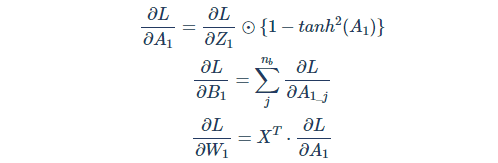

$\frac{\partial L}{\partial A_1}$ : gradient of loss $L$ with respect to $A_1$ (batch_size, n_nodes1)

$\frac{\partial L}{\partial A_{1_j}}$ : Gradient of loss $L$ with respect to $A_1$ of j-th sample (n_nodes1,)

$\frac{\partial L}{\partial B_1}$ : gradient of loss $L$ with respect to $B_1$ (n_nodes1,)

$\frac{\partial L}{\partial W_1}$ : gradient of loss $L$ with respect to $W_1$ (n_features, n_nodes1)

$\frac{\partial L}{\partial Z_1}$ : Gradient of loss $L$ with respect to $Z_1$ (batch_size, n_nodes1)

$A_1$ : 1st layer output (batch_size, n_nodes1)

$X$ : feature vector (batch_size, n_features)

$W_1$ : 1st layer weight (n_features, n_nodes1)

### Implementation

In [ ]:
def backward(self, X, y):
    dA3 = (self.Z3 - y)/self.batch_size
    dW3 = self.Z2.T @ dA3
    dB3 = np.sum(dA3, axis=0)
    dZ2 = dA3 @ self.W3.T
    dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
    dW2 = self.Z1.T @ dA2
    dB2 = np.sum(dA2, axis=0)
    dZ1 = dA2 @ self.W2.T
    dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
    dW1 = X.T @ dA1
    dB1 = np.sum(dA1, axis=0)
    self.W3 -= self.lr * dW3
    self.B3 -= self.lr * dB3
    self.W2 -= self.lr * dW2
    self.B2 -= self.lr * dB2
    self.W1 -= self.lr * dW1
    self.B1 -= self.lr * dB1

Line 1: Function definition.

Line 2: receiving explanatory variable X and objective variable y as arguments : 3rd layer, inverse calculation of activation function softmax, $\frac{\partial L}{\partial A_3} = \frac{1}{

Line 3: n_b}(Z_{3} - Y)$: 3rd layer, calculation of inverse weights, $\frac{\partial L}{\partial W_3} = Z_{2}^{T} \ cdot \frac{\partial L}{\partial A_3}$ part

Line 4: 3rd layer, inverse bias calculation, $\frac{\partial L}{\partial B_3} = \sum_{j}^ {n_b}\frac{\partial L}{\partial A_{3_j}}$ part

Line 5: 2nd layer, inverse calculation of output, $\frac{\partial L}{\partial Z_2} = \ frac{\partial L}{\partial A_3} \cdot W_3^T$ part

Line 6: 2nd layer, inverse calculation of activation function tanh, $\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot {1-tanh^2(A_{2})}$ part

Line 7: 2nd layer, weight inverse computation, $\frac{\partial Part of L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}$

Line 8: 2nd layer, inverse bias calculation, $\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2_j }}$ part

Line 9: 1st layer, inverse calculation of output $\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T$ Part

Line 10: 1st layer, inverse calculation of activation function tanh, $\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot {1- Part of tanh^2(A_{1})}$

Line 11: 1st layer, calculation of inverse weight $\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial Part of L}{\partial A_1}$

line 12: 1st layer, inverse calculation of bias, $\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{ Part of \partial L}{\partial A_{1_j}}$

Lines 13 to 18: Each gradient is multiplied by the learning rate to update the weights and biases.

# Estimation

In [ ]:
def predict(self, X):
    self.forward(X)
    return np.argmax(self.Z3, axis=1)

Line 1: Function definition. The second line that receives the explanatory variable X as an argument
: The third line that passes the explanatory variable X to the forward propagation function and executes it
: The output layer has 10 nodes, and the index of the maximum value is the classified class Because it determines np.argmaxthat, the index of the maximum value is obtained by

Regarding the processing of the 3rd line, when classifying, the processing as described above (using the index of the maximum value) is performed.
However, for continuous value prediction, it is common to have one node in the output layer, adopt the identity function as the activation function of the output layer, and adopt the MSE as the loss function.

# Training and Estimation

In [ ]:
def fit(self, X, y, X_val=None, y_val=None):
    for _ in range(self.epoch):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        for mini_X_train, mini_y_train in get_mini_batch:
            self.forward(mini_X_train)
            self.backward(mini_X_train, mini_y_train)
        self.forward(X)
        self.loss_train.append(self.cross_entropy_error(y, self.Z3))
        if X_val is not None:
            self.forward(X_val)
            self.loss_val.append(self.cross_entropy_error(y_val, self.Z3))
    if self.verbose:
        if X_val is None:
            print(self.loss_train)
        else:
            print(self.loss_train,self.loss_val)

Line 1: Function definition. As arguments, the explanatory variable X of the training data, the objective variable y of the training data, the explanatory variable X_val of the evaluation data, and the objective variable y_val of the evaluation data are
received
. GetMiniBatch, X,yand get_mini_batchcreate an iterator for minibatch 

Line 4: The for statement is passed using the
created iterator. get_mini_batchThe iterator generates explanatory variables and objective variables for the mini-batch size, so it is mini_X_train, mini_y_trainreceived as

Line 5: Forward propagation processing

Line 6: Back propagation processing

Line 7: After learning with all mini-batches , passing
forward propagation across the explanatory variables 

Line 8: pass the output of the output layer computed in line 7, along with self.Z3the correct data y, to the cross-entropy error function to obtain the loss. loss_trainStore that loss in . Using this loss_train, we will visualize the learning process in the future.

Line 9: X_valDetermine whether the evaluation data has a value

Line 10: Forward propagation processing of the evaluation data

Line 11: Calculated in line 10 We pass the output of the output layer along with self.Z3the correct answer data to the cross-entropy error function to obtain the loss. Store y_valthat loss in . loss_valUsing this loss_val, we will visualize the learning process in the future.

Line 12: Determines whether or not to output the learning process

Line 13: Only X_valif there is no value in Line 14: If there is a value inloss_trainprint
X_valloss_trainloss_valprint

### Accuracy calculation

In [ ]:
from sklearn.metrics import accuracy_score
pred_train = nn.predict(X_train)
accuracy = accuracy_score(y_train, pred_train)

1st line: import the Accuracy calculation function

2nd line: nnexecute the predict function of the trained instance and pred_trainreceive the return value (predicted value)

3rd line: accuracy_scorecorrect data ( y_train) and predicted value ( pred_train) passing and calculating accuracy

### Curve plot

In [ ]:
plt.plot(range(nn.epoch), nn.loss_train)

Line 1: I put the X and y I want to draw in the matplotlib visualization function. Here, we adopt the number of learning times on the x-axis and loss_train on the y-axis